# Tugas 1 - Prediksi Harga Sahaam BTN Menggunakan Metode LSTM

PREDIKSI HARGA SAHAM BTN MENGGUNAKAN METODE LSTM

## 1.1 Latar Belakang

Saham adalah salah satu instrumen investasi yang banyak diminati karena potensi keuntungannya yang tinggi. Di Indonesia, PT Bank Tabungan Negara (Persero) Tbk (BTN) merupakan salah satu perusahaan yang terdaftar di Bursa Efek Indonesia (BEI). Sebagai bank yang fokus pada pembiayaan perumahan, kinerja saham BTN sangat dipengaruhi oleh kondisi ekonomi, kebijakan pemerintah, dan tingkat suku bunga.


Prediksi harga saham menjadi krusial bagi investor dan analis pasar dalam mengambil keputusan investasi. Dengan prediksi yang akurat, investor dapat mengoptimalkan keuntungan sekaligus meminimalkan risiko. Namun, sifat harga saham yang fluktuatif dan dipengaruhi oleh berbagai faktor eksternal menjadikannya tantangan besar untuk diprediksi secara konvensional.


LSTM (Long Short-Term Memory) adalah salah satu algoritma deep learning yang dirancang untuk memproses data sekuensial, seperti data time series harga saham. Kemampuannya dalam menangkap pola jangka panjang dan hubungan temporal menjadikan LSTM pilihan yang sesuai untuk memprediksi harga saham. Oleh karena itu, penelitian ini bertujuan untuk memanfaatkan metode LSTM dalam memprediksi harga saham BTN, sehingga memberikan wawasan bagi investor dan pelaku pasar.

## 1.2. Rumusan Masalah

Bagaimana metode LSTM dapat digunakan untuk memprediksi harga saham BTN dengan akurasi yang baik, dan bagaimana hasil prediksi ini dapat membantu investor dalam pengambilan keputusan investasi?

## 1.3. Tujuan Penelitian

Mengembangkan model prediksi harga saham BTN menggunakan metode LSTM.
Menganalisis akurasi model prediksi LSTM dibandingkan dengan metode tradisional.
Memberikan rekomendasi berdasarkan hasil prediksi untuk mendukung keputusan investasi.

## 1.4. Manfaat Penelitian

1. Bagi Investor: Memberikan alat bantu untuk memprediksi pergerakan harga saham BTN dengan lebih akurat.

2. Bagi Perusahaan: Membantu BTN memahami pola harga sahamnya dan faktor-faktor yang mempengaruhi pergerakannya.
3. Bagi Akademisi: Memberikan kontribusi pada pengembangan aplikasi LSTM dalam prediksi harga saham di pasar Indonesia.
Dengan memahami latar belakang bisnis, penelitian ini akan mempermudah dalam menjawab kebutuhan investor dan pelaku pasar yang ingin memanfaatkan data historis untuk mendukung pengambilan keputusan strategis.

# DATA UNDERSTANDING

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from tensorflow.keras.models import load_model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import LSTM, Dense
import joblib
import warnings
import time
warnings.filterwarnings("ignore")

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
file_path = "BBTN.csv"

df = pd.read_csv(file_path)

In [ ]:
df.head()

,date,previous,open_price,first_trade,high,low,close,change,volume,value,...,bid_volume,listed_shares,tradeble_shares,weight_for_index,foreign_sell,foreign_buy,delisting_date,non_regular_volume,non_regular_value,non_regular_frequency
0,2019-07-29,2400.0,2400.0,2400.0,2410.0,2360.0,2390.0,-10.0,14447500.0,3.444723e+10,...,16300.0,1.048410e+10,1.048410e+10,1.048410e+10,6144100.0,58500.0,NaN,3145750.0,7.581002e+09,5.0
1,2019-07-30,2390.0,2380.0,2380.0,2460.0,2380.0,2450.0,60.0,14862600.0,3.613488e+10,...,105800.0,1.048410e+10,1.048410e+10,1.048410e+10,4275500.0,204000.0,NaN,2359500.0,5.683796e+09,3.0
2,2019-07-31,2450.0,2450.0,2440.0,2460.0,2420.0,2460.0,10.0,17919400.0,4.374584e+10,...,10000.0,1.048410e+10,1.048410e+10,1.048410e+10,8850700.0,3690200.0,NaN,2800401.0,6.846480e+09,10.0
3,2019-08-01,2460.0,2440.0,2440.0,2450.0,2380.0,2400.0,-60.0,19681000.0,4.721296e+10,...,327900.0,1.048410e+10,1.048410e+10,1.048410e+10,6396000.0,746400.0,NaN,4901392.0,1.179340e+10,9.0
4,2019-08-02,2400.0,2380.0,2380.0,2380.0,2320.0,2320.0,-80.0,25885800.0,6.061979e+10,...,1520100.0,1.048410e+10,1.048410e+10,1.048410e+10,8039800.0,4791500.0,NaN,5015050.0,1.184047e+10,7.0


# PREPROCESSING

### Transforming **Data**

In [ ]:
df.drop(['open_price', 'high', 'low','volume','change','previous', 'first_trade', 'value', 'bid_volume','listed_shares','tradeble_shares','frequency', 'index_individual', 'offer', 'offer_volume', 'bid', 'non_regular_volume','weight_for_index', 'foreign_sell', 'foreign_buy', 'delisting_date', 'non_regular_value','non_regular_frequency'], axis=1, inplace=True)

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
NumCols = df.columns.drop(['date'])
df[NumCols] = df[NumCols].replace({',': ''}, regex=True)
df[NumCols] = df[NumCols].astype('float64')

### **Checking Missing Values and Duplicates**

In [ ]:
df.isnull().sum()

date     0
close    0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

## Data Scaling

In [ ]:
close_prices = df['close'].values.reshape(-1, 1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

In [ ]:
def create_dataset(data, time_step=3):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [ ]:
time_step = 3
X, Y = create_dataset(scaled_data, time_step)

In [ ]:
X = X.reshape(X.shape[0], X.shape[1], 1)

## Splitting Data to Training & Test Sets

In [ ]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]
test_size


224

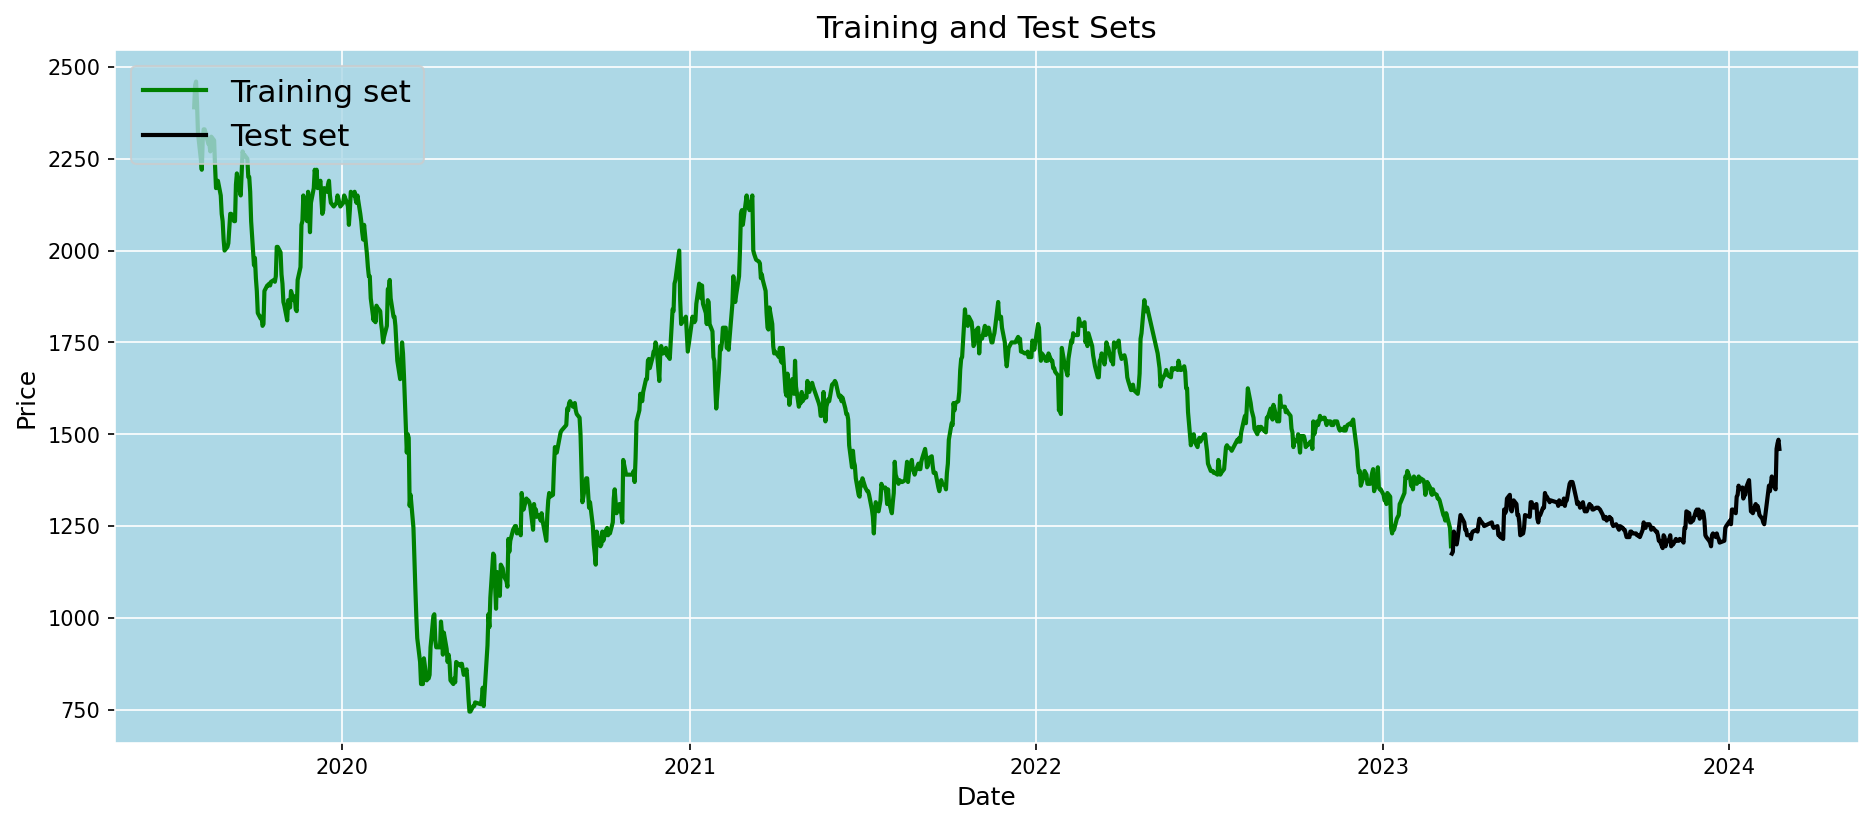

In [ ]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'lightblue'
plt.rc('axes',edgecolor='white')
plt.plot(df.date[:-test_size], df.close[:-test_size], color='green', lw=2)
plt.plot(df.date[-test_size:], df.close[-test_size:], color='black', lw=2)
plt.title('Training and Test Sets', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [ ]:
train_data = df.close[:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1, 1))

In [ ]:
X_train = []
y_train = []

for i in range(time_step, len(train_data)):
    X_train.append(train_data[i-time_step:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
test_data = df.close[-(test_size + time_step):]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [ ]:
X_test = []
y_test = []

for i in range(time_step, len(test_data)):
    X_test.append(test_data[i-time_step:i, 0])
    y_test.append(test_data[i, 0])

In [ ]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [ ]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (893, 3, 1)
y_train Shape:  (893, 1)
X_test Shape:   (224, 3, 1)
y_test Shape:   (224, 1)


# PROCESSING

## Build a model LSTM

In [ ]:
def define_model():
    input1 = Input(shape=(time_step,1))
    x = LSTM(units = 64, return_sequences=True)(input1)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64, return_sequences=True)(x)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64)(x)
    x = Dropout(0.2)(x)
    x = Dense(32)(x)
    dnn_output = Dense(1)(x)
    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='nadam')
    model.summary()
    return model

In [ ]:
# model = Model(inputs=input1, outputs=[dnn_output])
# model.compile(loss='mean_squared_error', optimizer='nadam')
# model.summary()
# return model

In [ ]:
start_time = time.time()

model = define_model()
history = model.fit(X_train, y_train, epochs=200, batch_size=60, validation_split=0.1, verbose=1)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 3, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 3, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 3, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,057 (332.25 KB)

 Trainable params: 85,057 (332.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.2545 - val_loss: 0.0015
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0228 - val_loss: 0.0078
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0144 - val_loss: 0.0071
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0092 - val_loss: 0.0029
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0053 - val_loss: 5.0672e-04
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0038 - val_loss: 4.2168e-04
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - val_loss: 3.4428e-04
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0041 - val_loss: 3.5845e-04
Epoch 9/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0038 - val_loss: 3.6583e-04
Epoch 10/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0041 - val_loss: 4.1813e-04
Epoch 11/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0038 - val_loss: 3.5298e-04
Epoch 12/200
14/14 ━━━━━

# Evaluasi Model

In [ ]:
end_time = time.time()
execution_time = end_time - start_time
print(f"Total waktu eksekusi: {execution_time} detik")

Total waktu eksekusi: 38.483174562454224 detik


In [ ]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4634e-04 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


In [ ]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE

## Cek Mape

In [ ]:
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.00015436105604749173
Test MAPE: 0.02522298758670519
Test Accuracy: 0.9747770124132948


In [ ]:
df_test = pd.DataFrame(y_test, columns=['Actual'])
df_pred = pd.DataFrame(y_pred, columns=['Predicted'])

In [ ]:
comparison_df = pd.concat([df_test, df_pred], axis=1)

In [ ]:
comparison_df['MAPE (%)'] = np.abs((comparison_df['Actual'] - comparison_df['Predicted']) / comparison_df['Actual']) * 100

In [ ]:
print(comparison_df)

       Actual  Predicted   MAPE (%)
0    0.250729   0.264849   5.631472
1    0.253644   0.251999   0.648779
2    0.285714   0.252699  11.555177
3    0.265306   0.280082   5.569275
4    0.274052   0.265432   3.145644
..        ...        ...        ...
219  0.352770   0.357499   1.340610
220  0.416910   0.349666  16.129064
221  0.425656   0.404902   4.875795
222  0.431487   0.416482   3.477510
223  0.416910   0.423709   1.631016

[224 rows x 3 columns]


In [ ]:
overall_mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print(f"Overall MAPE: {overall_mape:.2f}%")

Overall MAPE: 2.52%


In [ ]:
total_mape = comparison_df['MAPE (%)'].sum()

In [ ]:
summary_row = pd.DataFrame({'Actual': ['Total'], 'Predicted': [''], 'MAPE (%)': [total_mape]})
comparison_df = pd.concat([comparison_df, summary_row])

print(comparison_df)

       Actual Predicted    MAPE (%)
0    0.250729  0.264849    5.631472
1    0.253644  0.251999    0.648779
2    0.285714  0.252699   11.555177
3    0.265306  0.280082    5.569275
4    0.274052  0.265432    3.145644
..        ...       ...         ...
220   0.41691  0.349666   16.129064
221  0.425656  0.404902    4.875795
222  0.431487  0.416482    3.477510
223   0.41691  0.423709    1.631016
0       Total            564.994922

[225 rows x 3 columns]


In [ ]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

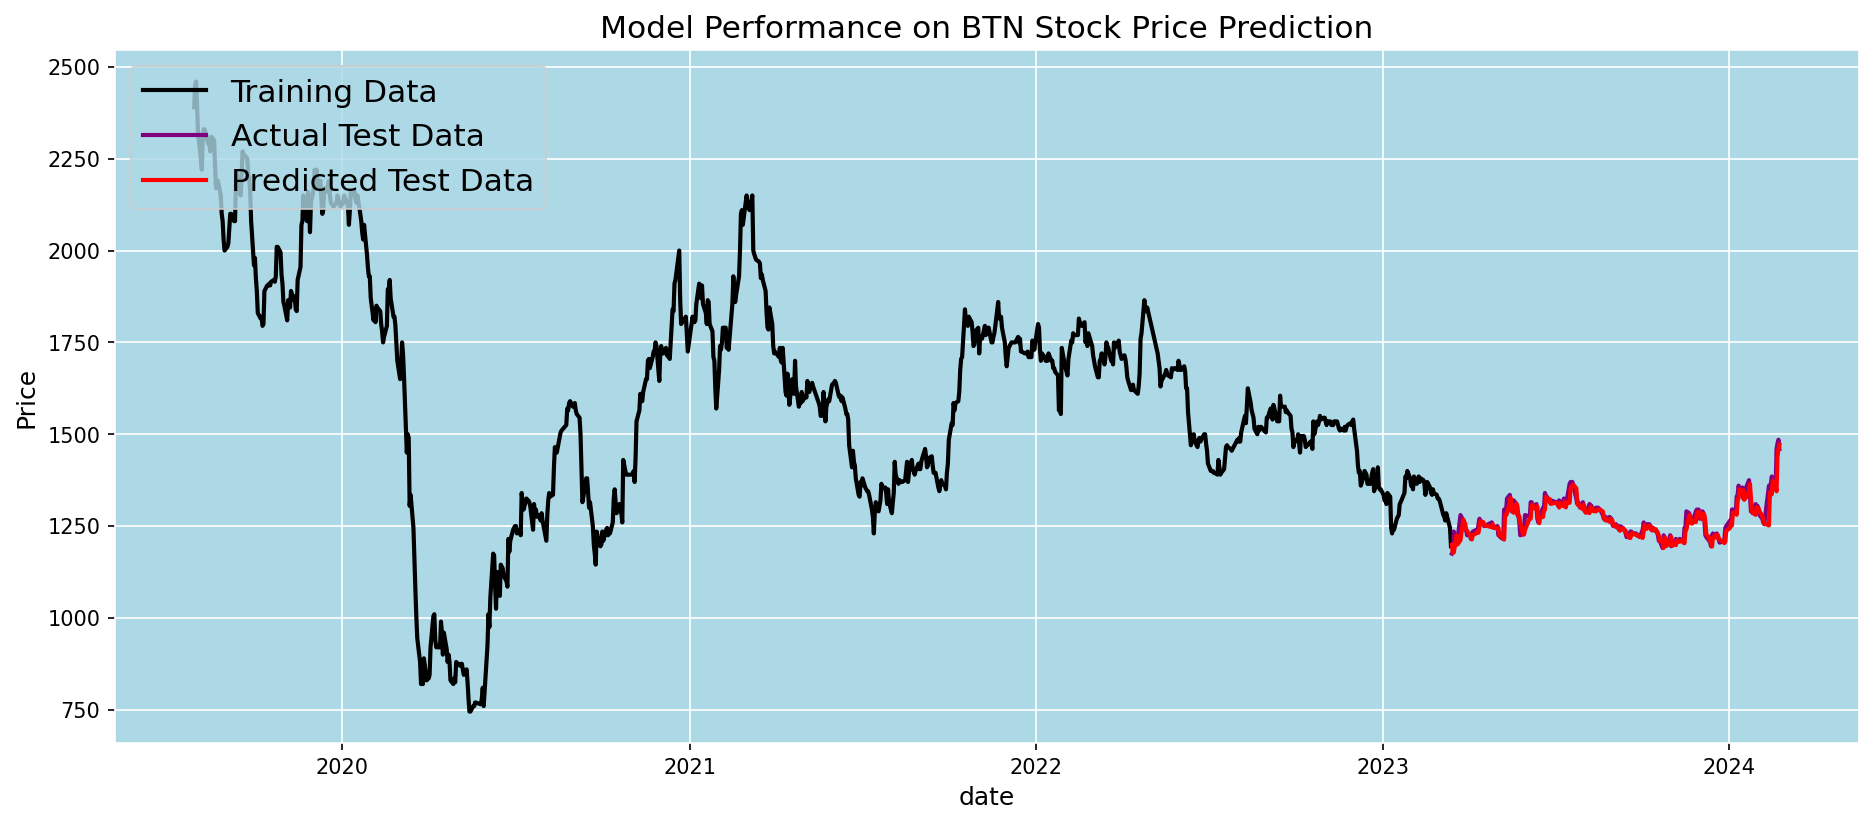

In [ ]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'lightblue'
plt.rc('axes',edgecolor='white')
plt.plot(df['date'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['date'].iloc[-test_size:], y_test_true, color='purple', lw=2)
plt.plot(df['date'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Model Performance on BTN Stock Price Prediction', fontsize=15)
plt.xlabel('date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

Diagram di atas menunjukkan performa model prediksi harga saham BTN menggunakan metode LSTM (Long Short-Term Memory). Berikut adalah penjelasan secara rinci:

1. Penjelasan Warna dan Elemen Diagram
Hitam (Training Data): Menunjukkan data historis harga saham BTN yang digunakan untuk melatih model LSTM. Data ini mencakup periode hingga akhir data pelatihan.
Ungu (Actual Test Data): Menunjukkan harga saham sebenarnya pada data uji yang tidak digunakan selama pelatihan, tetapi digunakan untuk mengevaluasi kinerja model.
Merah (Predicted Test Data): Menunjukkan hasil prediksi harga saham BTN pada data uji yang dihasilkan oleh model LSTM.
2. Gambaran Umum Pola
Data historis saham BTN menunjukkan volatilitas yang tinggi, dengan kenaikan dan penurunan harga yang cukup signifikan dari tahun ke tahun.
Prediksi model (garis merah) mengikuti pola yang mendekati harga aktual pada data uji (garis ungu), terutama dalam tren naik dan turun.
3. Kinerja Model
Model mampu menangkap pola temporal dari data historis, yang terlihat dari prediksi yang hampir sejajar dengan data aktual pada sebagian besar waktu.
Namun, terdapat beberapa deviasi kecil antara prediksi dan data aktual, yang menunjukkan bahwa model masih memiliki margin error, terutama pada fluktuasi tajam.
4. Signifikansi
Diagram ini menunjukkan bahwa metode LSTM dapat digunakan untuk memprediksi harga saham BTN dengan akurasi yang cukup baik. Hasil ini dapat menjadi alat bantu bagi investor untuk memahami pergerakan harga saham di masa mendatang.

In [ ]:
model.save('lstm_stock_model.h5')
joblib.dump(scaler, 'ScalerProject1.pkl')
# joblib.dump(model, 'model.pkl')

['ScalerProject1.pkl']

In [ ]:
model = load_model('lstm_stock_model.h5')
scaler = joblib.load('scaler.pkl')

In [ ]:
def predict_stock_price(model, scaler, last_3_days_prices):
    last_3_days_prices = np.array(last_3_days_prices).reshape(-1, 1)
    last_3_days_prices = scaler.transform(last_3_days_prices)
    last_3_days_prices = last_3_days_prices.reshape(1, 3, 1)

    predicted_price = model.predict(last_3_days_prices)

    predicted_price = scaler.inverse_transform(predicted_price)
    return predicted_price[0][0]


In [ ]:
model = load_model('lstm_stock_model.h5')
scaler = joblib.load('scaler.pkl')

In [ ]:
import streamlit as st

In [ ]:
import numpy as np
from keras.models import load_model
import joblib
from sklearn.preprocessing import StandardScaler  # Menggunakan Standard Scaler sebagai contoh

# Muat model LSTM dan scaler
model = load_model('lstm_stock_model.h5')
scaler = joblib.load('scaler.pkl')

# Misalkan data yang sudah diskalakan untuk harga penutupan 3 hari terakhir
last_3_days_prices = np.array([11000, 12000, 12000]).reshape(-1, 1)

# Gunakan StandardScaler untuk merubah data
scaler = StandardScaler()
last_3_days_prices_scaled = scaler.fit_transform(last_3_days_prices)

# Sesuaikan input ke bentuk yang diharapkan oleh model
input_data = last_3_days_prices_scaled.reshape(1, 3, 1)

# Prediksi harga penutupan berikutnya
predicted_price = model.predict(input_data)

# Kembalikan data ke skala asli
predicted_price = scaler.inverse_transform(predicted_price)

print(f"Prediksi harga penutupan hari berikutnya: {predicted_price[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
Prediksi harga penutupan hari berikutnya: 11944.4375


In [ ]:
# %%writefile app.py
import numpy as np
import streamlit as st
from keras.models import load_model
import joblib
from sklearn.preprocessing import StandardScaler

# Muat model LSTM dan scaler
model = load_model('lstm_stock_model.h5')
scaler = joblib.load('ScalerProject1.pkl')

# Function to predict stock price
def predict_stock_price(last_3_days_prices):
    last_3_days_prices = np.array(last_3_days_prices).reshape(-1, 1)
    scaler = StandardScaler()
    last_3_days_prices_scaled = scaler.fit_transform(last_3_days_prices)
    input_data = last_3_days_prices_scaled.reshape(1, 3, 1)

    predicted_price = model.predict(input_data)
    predicted_price = scaler.inverse_transform(predicted_price)

    return predicted_price[0][0]

# Streamlit app
st.title('Prediksi Harga Penutupan Saham Berikutnya')
st.write("Masukkan harga penutupan 3 hari terakhir:")

day1 = st.number_input("Harga penutupan hari ke-1", value=11000)
day2 = st.number_input("Harga penutupan hari ke-2", value=12000)
day3 = st.number_input("Harga penutupan hari ke-3", value=12000)

if st.button('Prediksi'):
    last_3_days_prices = [day1, day2, day3]
    predicted_price = predict_stock_price(last_3_days_prices)
    st.write(f"Prediksi harga penutupan berikutnya adalah: {predicted_price}")


Overwriting app.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!streamlit run app.py & npx localturnel --port 8501

^C


Saya juga membangun aplikasi untuk memudahkan dalam memprediksi dengan menggunakan streamlit. berikut adalah link nya :
https://huggingface.co/spaces/Aanadi/ProyekSainData
